### This notebook aims to explore about the audio features

Some of the audio features that we will explore:
- Root-Mean-Square Energy (RMS Energy)
- Zero-Crossing Rate (ZCR)
- Spectral Centroid
- Spectral Bandwidth
- Spectral Flatness
- Spectral Contrast
- Spectral Rolloff
- Chromagram STFT
- Constant-Q Chromagram
- Chromagram Variant "Chroma Energy Normalised" (CENS)
- Variable-Q Chromagram
- Melspectrogram
- MFCCs
- Poly Features
- Tonal Centroid Features

Question: what about other audio features?
- Currently, I have not studied/explored them yet.

### Import Libraries

In [1]:
%matplotlib inline
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
# import pandas as pd

### Load Sample Audios

In [2]:
yes_audios = os.listdir("../data/yes/")
no_audios = os.listdir("../data/no/")

# we will grab the first two audios in each class
sample_yes_audio1_path = "../data/yes/" + yes_audios[0]
sample_yes_audio2_path = "../data/yes/" + yes_audios[1]
sample_yes_audio3_path = "../data/yes/" + yes_audios[2]
sample_no_audio1_path = "../data/no/" + no_audios[0]
sample_no_audio2_path = "../data/no/" + no_audios[1]
sample_no_audio3_path = "../data/no/" + no_audios[2]

# load the audios
sample_yes_audio1, sr = librosa.load(sample_yes_audio1_path)
sample_yes_audio2, _ = librosa.load(sample_yes_audio2_path)
sample_yes_audio3, _ = librosa.load(sample_yes_audio3_path)
sample_no_audio1, _ = librosa.load(sample_no_audio1_path)
sample_no_audio2, _ = librosa.load(sample_no_audio2_path)
sample_no_audio3, _ = librosa.load(sample_no_audio3_path)

In [3]:
ipd.Audio(sample_yes_audio1_path)

In [4]:
ipd.Audio(sample_yes_audio2_path)

In [5]:
ipd.Audio(sample_yes_audio3_path)

In [6]:
ipd.Audio(sample_no_audio1_path)

In [7]:
ipd.Audio(sample_no_audio2_path)

In [8]:
ipd.Audio(sample_no_audio3_path)

### Define Some Constants

In [9]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

### Root-Mean-Square Energy (RMS Energy)

Mean:
'yes audio 1':  0.020706964656710625
'yes audio 2':  0.0698561817407608
'yes audio 3':  0.06950075924396515
'no audio 1':   0.019071877002716064
'no audio 2':   0.03731701523065567
'no audio 2':   0.010822663083672523

Standard Deviation:
'yes audio 1':  0.0014143039006739855
'yes audio 2':  0.005953685380518436
'yes audio 3':  0.023214204236865044
'no audio 1':   0.006784404627978802
'no audio 2':   0.01239527016878128
'no audio 3':   0.0021177814342081547

Variance:
'yes audio 1':  2.0002555629616836e-06
'yes audio 2':  3.5446370020508766e-05
'yes audio 3':  0.0005388992722146213
'no audio 1':   4.60281444247812e-05
'no audio 2':   0.00015364271530415863
'no audio 3':   4.484998044063104e-06



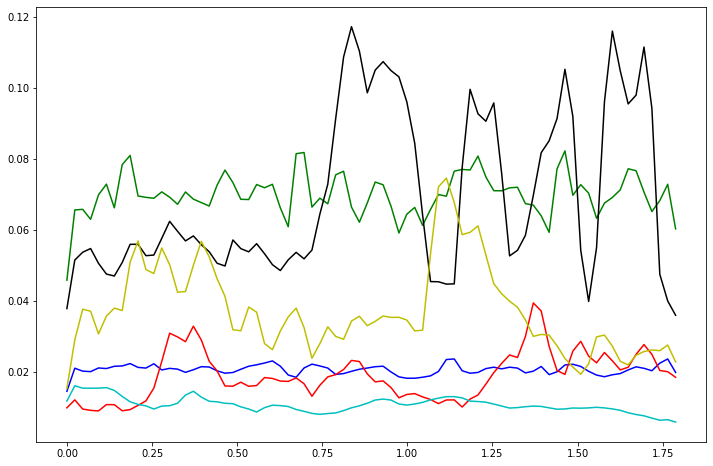

In [10]:
# RMS Energy as the y-axis
rms_yes_1 = librosa.feature.rms(y=sample_yes_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_yes_2 = librosa.feature.rms(y=sample_yes_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_yes_3 = librosa.feature.rms(y=sample_yes_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_no_1 = librosa.feature.rms(y=sample_no_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_no_2 = librosa.feature.rms(y=sample_no_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_no_3 = librosa.feature.rms(y=sample_no_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(rms_yes_1)}
'yes audio 2':  {np.mean(rms_yes_2)}
'yes audio 3':  {np.mean(rms_yes_3)}
'no audio 1':   {np.mean(rms_no_1)}
'no audio 2':   {np.mean(rms_no_2)}
'no audio 2':   {np.mean(rms_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(rms_yes_1)}
'yes audio 2':  {np.std(rms_yes_2)}
'yes audio 3':  {np.std(rms_yes_3)}
'no audio 1':   {np.std(rms_no_1)}
'no audio 2':   {np.std(rms_no_2)}
'no audio 3':   {np.std(rms_no_3)}

Variance:
'yes audio 1':  {np.var(rms_yes_1)}
'yes audio 2':  {np.var(rms_yes_2)}
'yes audio 3':  {np.var(rms_yes_3)}
'no audio 1':   {np.var(rms_no_1)}
'no audio 2':   {np.var(rms_no_2)}
'no audio 3':   {np.var(rms_no_3)}
""")

# Time as the x-axis
frames = range(0, rms_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, rms_yes_1, color='b')
plt.plot(t, rms_yes_2, color='g')
plt.plot(t, rms_yes_3, color='k')
plt.plot(t, rms_no_1, color='r')
plt.plot(t, rms_no_2, color='y')
plt.plot(t, rms_no_3, color='c')
plt.show()

### Zero-Crossing Rate (ZCR)

Mean:
'yes audio 1':  0.15718900240384615
'yes audio 2':  0.15368339342948717
'yes audio 3':  0.1315479767628205
'no audio 1':   0.14587089342948717
'no audio 2':   0.032126402243589744
'no audio 3':   0.05151993189102564

Standard Deviation:
'yes audio 1':  0.012750513989594396
'yes audio 2':  0.015622737602854474
'yes audio 3':  0.03722224900523776
'no audio 1':   0.03368173684810031
'no audio 2':   0.008878459593079901
'no audio 3':   0.009419167181776518

Variance:
'yes audio 1':  0.0001625756069988424
'yes audio 2':  0.00024406993020764317
'yes audio 3':  0.0013854958210079234
'no audio 1':   0.0011344593971046783
'no audio 2':   7.882704474595252e-05
'no audio 3':   8.872071039825578e-05



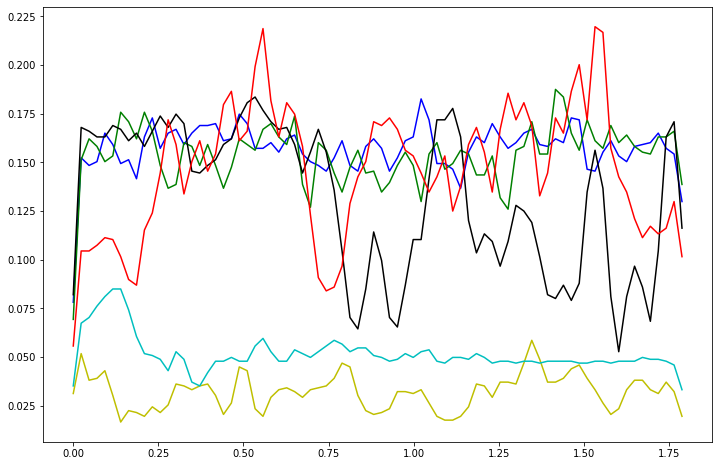

In [11]:
# Zero-Crossing Rate as the y-axis
zcr_yes_1 = librosa.feature.zero_crossing_rate(y=sample_yes_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_yes_2 = librosa.feature.zero_crossing_rate(y=sample_yes_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_yes_3 = librosa.feature.zero_crossing_rate(y=sample_yes_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_no_1 = librosa.feature.zero_crossing_rate(y=sample_no_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_no_2 = librosa.feature.zero_crossing_rate(y=sample_no_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_no_3 = librosa.feature.zero_crossing_rate(y=sample_no_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(zcr_yes_1)}
'yes audio 2':  {np.mean(zcr_yes_2)}
'yes audio 3':  {np.mean(zcr_yes_3)}
'no audio 1':   {np.mean(zcr_no_1)}
'no audio 2':   {np.mean(zcr_no_2)}
'no audio 3':   {np.mean(zcr_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(zcr_yes_1)}
'yes audio 2':  {np.std(zcr_yes_2)}
'yes audio 3':  {np.std(zcr_yes_3)}
'no audio 1':   {np.std(zcr_no_1)}
'no audio 2':   {np.std(zcr_no_2)}
'no audio 3':   {np.std(zcr_no_3)}

Variance:
'yes audio 1':  {np.var(zcr_yes_1)}
'yes audio 2':  {np.var(zcr_yes_2)}
'yes audio 3':  {np.var(zcr_yes_3)}
'no audio 1':   {np.var(zcr_no_1)}
'no audio 2':   {np.var(zcr_no_2)}
'no audio 3':   {np.var(zcr_no_3)}
""")

# Time as the x-axis
frames = range(0, zcr_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, zcr_yes_1, color='b')
plt.plot(t, zcr_yes_2, color='g')
plt.plot(t, zcr_yes_3, color='k')
plt.plot(t, zcr_no_1, color='r')
plt.plot(t, zcr_no_2, color='y')
plt.plot(t, zcr_no_3, color='c')
plt.show()

### Spectral Centroid

Mean:
'yes audio 1':  2357.8595500614038
'yes audio 2':  2602.5971338300064
'yes audio 3':  2325.031249808373
'no audio 1':   1997.084001507539
'no audio 2':   710.9654911083114
'no audio 3':   827.1245305811365

Standard Deviation:
'yes audio 1':  91.96260455145902
'yes audio 2':  171.93878032870563
'yes audio 3':  293.1292996626277
'no audio 1':   256.12365611108373
'no audio 2':   121.93464345309835
'no audio 3':   134.43130062451385

Variance:
'yes audio 1':  8457.120635888032
'yes audio 2':  29562.944180922892
'yes audio 3':  85924.78632070261
'no audio 1':   65599.32721970869
'no audio 2':   14868.057274034218
'no audio 3':   18071.774587598422



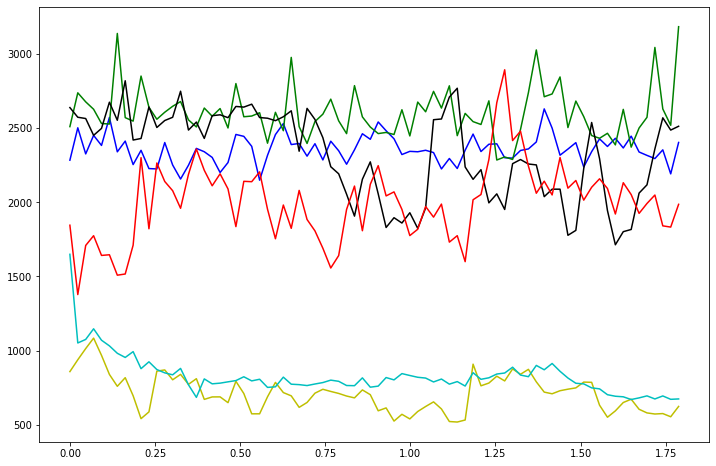

In [12]:
# Spectral Centroid as the y-axis
spectral_centroid_yes_1 = librosa.feature.spectral_centroid(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_yes_2 = librosa.feature.spectral_centroid(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_yes_3 = librosa.feature.spectral_centroid(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_no_1 = librosa.feature.spectral_centroid(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_no_2 = librosa.feature.spectral_centroid(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_no_3 = librosa.feature.spectral_centroid(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(spectral_centroid_yes_1)}
'yes audio 2':  {np.mean(spectral_centroid_yes_2)}
'yes audio 3':  {np.mean(spectral_centroid_yes_3)}
'no audio 1':   {np.mean(spectral_centroid_no_1)}
'no audio 2':   {np.mean(spectral_centroid_no_2)}
'no audio 3':   {np.mean(spectral_centroid_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_centroid_yes_1)}
'yes audio 2':  {np.std(spectral_centroid_yes_2)}
'yes audio 3':  {np.std(spectral_centroid_yes_3)}
'no audio 1':   {np.std(spectral_centroid_no_1)}
'no audio 2':   {np.std(spectral_centroid_no_2)}
'no audio 3':   {np.std(spectral_centroid_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_centroid_yes_1)}
'yes audio 2':  {np.var(spectral_centroid_yes_2)}
'yes audio 3':  {np.var(spectral_centroid_yes_3)}
'no audio 1':   {np.var(spectral_centroid_no_1)}
'no audio 2':   {np.var(spectral_centroid_no_2)}
'no audio 3':   {np.var(spectral_centroid_no_3)}
""")

# Time as the x-axis
frames = range(0, spectral_centroid_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_centroid_yes_1, color='b')
plt.plot(t, spectral_centroid_yes_2, color='g')
plt.plot(t, spectral_centroid_yes_3, color='k')
plt.plot(t, spectral_centroid_no_1, color='r')
plt.plot(t, spectral_centroid_no_2, color='y')
plt.plot(t, spectral_centroid_no_3, color='c')
plt.show()

### Spectral Bandwidth

Mean:
'yes audio 1':  1982.0431881994741
'yes audio 2':  2390.8187365532517
'yes audio 3':  2164.7978581558336
'no audio 1':   2138.944132071041
'no audio 2':   1030.3084023962228
'no audio 3':   1023.7346977620107

Standard Deviation:
'yes audio 1':  90.6453837048041
'yes audio 2':  116.99177471419101
'yes audio 3':  134.1050913328056
'no audio 1':   126.51746369622316
'no audio 2':   174.47524352126453
'no audio 3':   154.21290582315774

Variance:
'yes audio 1':  8216.585586991165
'yes audio 2':  13687.075350776022
'yes audio 3':  17984.175521380137
'no audio 1':   16006.668620125145
'no audio 2':   30441.610601804565
'no audio 3':   23781.62032242212



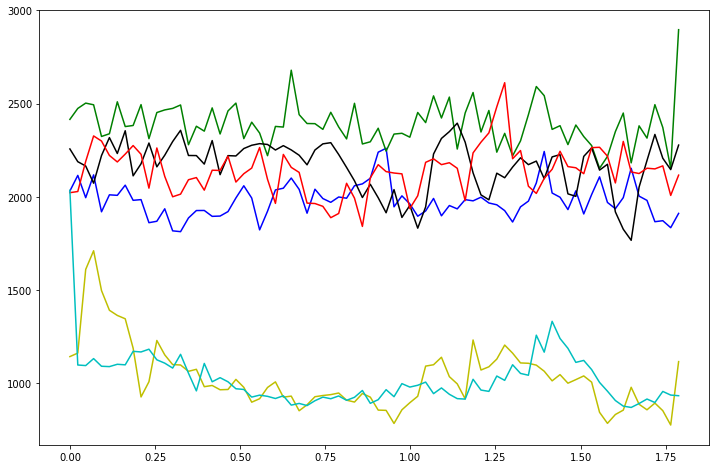

In [13]:
# Spectral Bandwidth as the y-axis
spectral_bandwidth_yes_1 = librosa.feature.spectral_bandwidth(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_yes_2 = librosa.feature.spectral_bandwidth(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_yes_3 = librosa.feature.spectral_bandwidth(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_no_1 = librosa.feature.spectral_bandwidth(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_no_2 = librosa.feature.spectral_bandwidth(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_no_3 = librosa.feature.spectral_bandwidth(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(spectral_bandwidth_yes_1)}
'yes audio 2':  {np.mean(spectral_bandwidth_yes_2)}
'yes audio 3':  {np.mean(spectral_bandwidth_yes_3)}
'no audio 1':   {np.mean(spectral_bandwidth_no_1)}
'no audio 2':   {np.mean(spectral_bandwidth_no_2)}
'no audio 3':   {np.mean(spectral_bandwidth_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_bandwidth_yes_1)}
'yes audio 2':  {np.std(spectral_bandwidth_yes_2)}
'yes audio 3':  {np.std(spectral_bandwidth_yes_3)}
'no audio 1':   {np.std(spectral_bandwidth_no_1)}
'no audio 2':   {np.std(spectral_bandwidth_no_2)}
'no audio 3':   {np.std(spectral_bandwidth_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_bandwidth_yes_1)}
'yes audio 2':  {np.var(spectral_bandwidth_yes_2)}
'yes audio 3':  {np.var(spectral_bandwidth_yes_3)}
'no audio 1':   {np.var(spectral_bandwidth_no_1)}
'no audio 2':   {np.var(spectral_bandwidth_no_2)}
'no audio 3':   {np.var(spectral_bandwidth_no_3)}
""")

# Time as the x-axis
frames = range(0, spectral_bandwidth_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_bandwidth_yes_1, color='b')
plt.plot(t, spectral_bandwidth_yes_2, color='g')
plt.plot(t, spectral_bandwidth_yes_3, color='k')
plt.plot(t, spectral_bandwidth_no_1, color='r')
plt.plot(t, spectral_bandwidth_no_2, color='y')
plt.plot(t, spectral_bandwidth_no_3, color='c')
plt.show()

### Spectral Flatness

Mean:
'yes audio 2':  0.05622652918100357
'yes audio 1':  0.030085215345025063
'yes audio 3':  0.028801046311855316
'no audio 1':   0.0017996961250901222
'no audio 2':   0.0002325694658793509
'no audio 3':   0.0003364073345437646

Standard Deviation:
'yes audio 1':  0.006499757524579763
'yes audio 2':  0.015985330566763878
'yes audio 3':  0.017881467938423157
'no audio 1':   0.002645219210535288
'no audio 2':   0.0003322565171401948
'no audio 3':   0.0016575527843087912

Variance:
'yes audio 1':  4.224684744258411e-05
'yes audio 2':  0.00025553081650286913
'yes audio 3':  0.0003197469050064683
'no audio 1':   6.997184755164199e-06
'no audio 2':   1.1039439584692445e-07
'no audio 3':   2.7474811759020668e-06



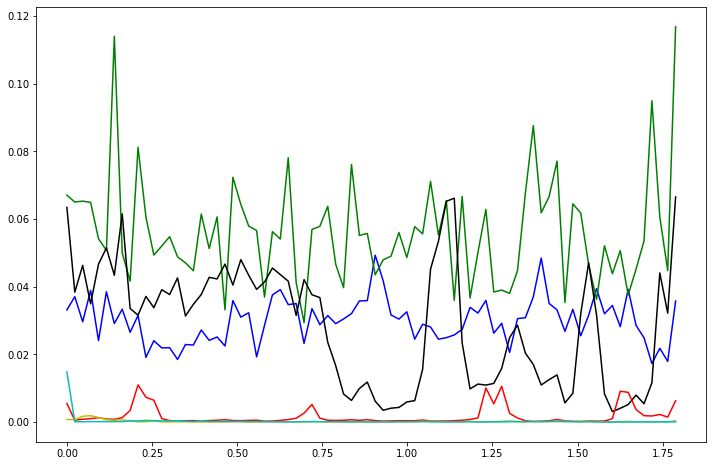

In [14]:
# Spectral Flatness as the y-axis
spectral_flatness_yes_1 = librosa.feature.spectral_flatness(y=sample_yes_audio1, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_yes_2 = librosa.feature.spectral_flatness(y=sample_yes_audio2, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_yes_3 = librosa.feature.spectral_flatness(y=sample_yes_audio3, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_no_1 = librosa.feature.spectral_flatness(y=sample_no_audio1, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_no_2 = librosa.feature.spectral_flatness(y=sample_no_audio2, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_no_3 = librosa.feature.spectral_flatness(y=sample_no_audio3, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(spectral_flatness_yes_2)}
'yes audio 1':  {np.mean(spectral_flatness_yes_1)}
'yes audio 3':  {np.mean(spectral_flatness_yes_3)}
'no audio 1':   {np.mean(spectral_flatness_no_1)}
'no audio 2':   {np.mean(spectral_flatness_no_2)}
'no audio 3':   {np.mean(spectral_flatness_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_flatness_yes_1)}
'yes audio 2':  {np.std(spectral_flatness_yes_2)}
'yes audio 3':  {np.std(spectral_flatness_yes_3)}
'no audio 1':   {np.std(spectral_flatness_no_1)}
'no audio 2':   {np.std(spectral_flatness_no_2)}
'no audio 3':   {np.std(spectral_flatness_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_flatness_yes_1)}
'yes audio 2':  {np.var(spectral_flatness_yes_2)}
'yes audio 3':  {np.var(spectral_flatness_yes_3)}
'no audio 1':   {np.var(spectral_flatness_no_1)}
'no audio 2':   {np.var(spectral_flatness_no_2)}
'no audio 3':   {np.var(spectral_flatness_no_3)}
""")

# Time as the x-axis
frames = range(0, spectral_flatness_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_flatness_yes_1, color='b')
plt.plot(t, spectral_flatness_yes_2, color='g')
plt.plot(t, spectral_flatness_yes_3, color='k')
plt.plot(t, spectral_flatness_no_1, color='r')
plt.plot(t, spectral_flatness_no_2, color='y')
plt.plot(t, spectral_flatness_no_3, color='c')
plt.show()

### Spectral Contrast

Mean:
'yes audio 2':  11.9358198380738
'yes audio 1':  10.178181011469977
'yes audio 3':  12.27139272994836
'no audio 1':   9.658619612063879
'no audio 2':   11.684333597230077
'no audio 3':   14.712535893530056

Standard Deviation:
'yes audio 1':  3.088557118980104
'yes audio 2':  4.020075185189571
'yes audio 3':  6.304754887546171
'no audio 1':   4.398693414555478
'no audio 2':   3.0867344468077516
'no audio 3':   6.173082818338713

Variance:
'yes audio 1':  9.539185077202681
'yes audio 2':  16.161004494576957
'yes audio 3':  39.74993419203733
'no audio 1':   19.34850375525373
'no audio 2':   9.527929545109556
'no audio 3':   38.10695148206863



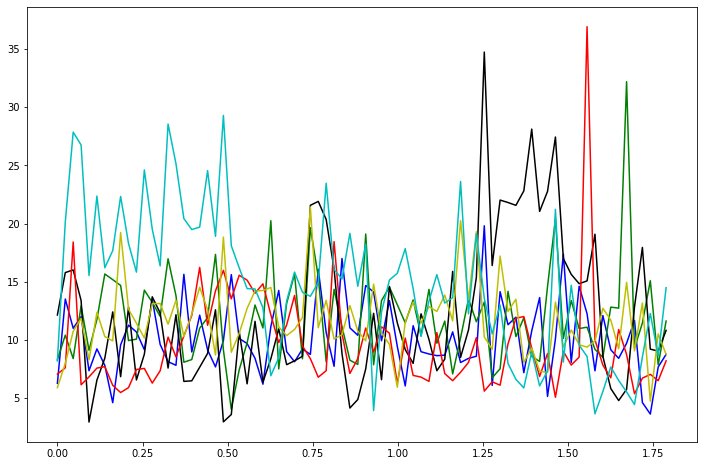

In [15]:
# Spectral Contrast as the y-axis
spectral_contrast_yes_1 = librosa.feature.spectral_contrast(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_contrast_yes_2 = librosa.feature.spectral_contrast(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_contrast_yes_3 = librosa.feature.spectral_contrast(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_contrast_no_1 = librosa.feature.spectral_contrast(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_contrast_no_2 = librosa.feature.spectral_contrast(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_contrast_no_3 = librosa.feature.spectral_contrast(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(spectral_contrast_yes_2)}
'yes audio 1':  {np.mean(spectral_contrast_yes_1)}
'yes audio 3':  {np.mean(spectral_contrast_yes_3)}
'no audio 1':   {np.mean(spectral_contrast_no_1)}
'no audio 2':   {np.mean(spectral_contrast_no_2)}
'no audio 3':   {np.mean(spectral_contrast_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_contrast_yes_1)}
'yes audio 2':  {np.std(spectral_contrast_yes_2)}
'yes audio 3':  {np.std(spectral_contrast_yes_3)}
'no audio 1':   {np.std(spectral_contrast_no_1)}
'no audio 2':   {np.std(spectral_contrast_no_2)}
'no audio 3':   {np.std(spectral_contrast_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_contrast_yes_1)}
'yes audio 2':  {np.var(spectral_contrast_yes_2)}
'yes audio 3':  {np.var(spectral_contrast_yes_3)}
'no audio 1':   {np.var(spectral_contrast_no_1)}
'no audio 2':   {np.var(spectral_contrast_no_2)}
'no audio 3':   {np.var(spectral_contrast_no_3)}
""")

# Time as the x-axis
frames = range(0, spectral_contrast_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_contrast_yes_1, color='b')
plt.plot(t, spectral_contrast_yes_2, color='g')
plt.plot(t, spectral_contrast_yes_3, color='k')
plt.plot(t, spectral_contrast_no_1, color='r')
plt.plot(t, spectral_contrast_no_2, color='y')
plt.plot(t, spectral_contrast_no_3, color='c')
plt.show()

### Spectral Rolloff

Mean:
'yes audio 2':  5227.599158653846
'yes audio 1':  4036.371319110577
'yes audio 3':  4235.1393479567305
'no audio 1':   4080.265925480769
'no audio 2':   1363.76953125
'no audio 3':   1392.7565354567307

Standard Deviation:
'yes audio 1':  277.27832731835787
'yes audio 2':  494.81844113801446
'yes audio 3':  663.119872502445
'no audio 1':   401.3079459425423
'no audio 2':   295.9053934736708
'no audio 3':   435.37960338134667

Variance:
'yes audio 1':  76883.27080046639
'yes audio 2':  244845.2896902547
'yes audio 3':  439727.9653076589
'no audio 1':   161048.06747662244
'no audio 2':   87560.00188680795
'no audio 3':   189555.3990404987



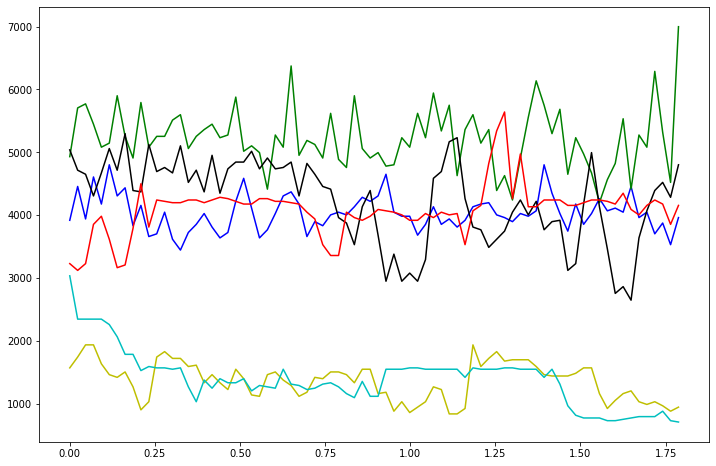

In [16]:
# Spectral Rolloff as the y-axis
spectral_rolloff_yes_1 = librosa.feature.spectral_rolloff(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_rolloff_yes_2 = librosa.feature.spectral_rolloff(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_rolloff_yes_3 = librosa.feature.spectral_rolloff(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_rolloff_no_1 = librosa.feature.spectral_rolloff(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_rolloff_no_2 = librosa.feature.spectral_rolloff(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_rolloff_no_3 = librosa.feature.spectral_rolloff(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(spectral_rolloff_yes_2)}
'yes audio 1':  {np.mean(spectral_rolloff_yes_1)}
'yes audio 3':  {np.mean(spectral_rolloff_yes_3)}
'no audio 1':   {np.mean(spectral_rolloff_no_1)}
'no audio 2':   {np.mean(spectral_rolloff_no_2)}
'no audio 3':   {np.mean(spectral_rolloff_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_rolloff_yes_1)}
'yes audio 2':  {np.std(spectral_rolloff_yes_2)}
'yes audio 3':  {np.std(spectral_rolloff_yes_3)}
'no audio 1':   {np.std(spectral_rolloff_no_1)}
'no audio 2':   {np.std(spectral_rolloff_no_2)}
'no audio 3':   {np.std(spectral_rolloff_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_rolloff_yes_1)}
'yes audio 2':  {np.var(spectral_rolloff_yes_2)}
'yes audio 3':  {np.var(spectral_rolloff_yes_3)}
'no audio 1':   {np.var(spectral_rolloff_no_1)}
'no audio 2':   {np.var(spectral_rolloff_no_2)}
'no audio 3':   {np.var(spectral_rolloff_no_3)}
""")

# Time as the x-axis
frames = range(0, spectral_rolloff_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_rolloff_yes_1, color='b')
plt.plot(t, spectral_rolloff_yes_2, color='g')
plt.plot(t, spectral_rolloff_yes_3, color='k')
plt.plot(t, spectral_rolloff_no_1, color='r')
plt.plot(t, spectral_rolloff_no_2, color='y')
plt.plot(t, spectral_rolloff_no_3, color='c')
plt.show()

### Chromagram from Short-Time Fourier Transform

Mean:
'yes audio 2':  0.6833961009979248
'yes audio 1':  0.6477438807487488
'yes audio 3':  0.5104301571846008
'no audio 1':   0.11739009618759155
'no audio 2':   0.4797981083393097
'no audio 3':   0.804056704044342

Standard Deviation:
'yes audio 1':  0.22082756459712982
'yes audio 2':  0.19161365926265717
'yes audio 3':  0.28944364190101624
'no audio 1':   0.10254795104265213
'no audio 2':   0.2711053192615509
'no audio 3':   0.3434317708015442

Variance:
'yes audio 1':  0.04876481369137764
'yes audio 2':  0.0367157943546772
'yes audio 3':  0.08377762883901596
'no audio 1':   0.010516081936657429
'no audio 2':   0.07349810004234314
'no audio 3':   0.11794538050889969



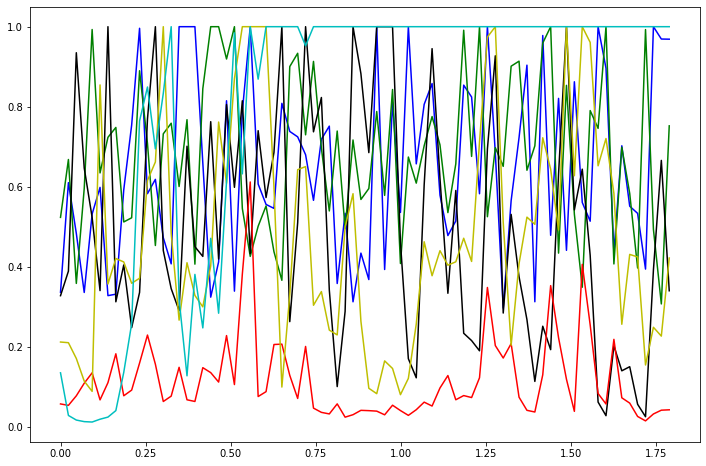

In [17]:
# Chromagram Short-Time Fourier Transform as the y-axis
chroma_stft_yes_1 = librosa.feature.chroma_stft(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
chroma_stft_yes_2 = librosa.feature.chroma_stft(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
chroma_stft_yes_3 = librosa.feature.chroma_stft(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
chroma_stft_no_1 = librosa.feature.chroma_stft(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
chroma_stft_no_2 = librosa.feature.chroma_stft(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
chroma_stft_no_3 = librosa.feature.chroma_stft(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(chroma_stft_yes_2)}
'yes audio 1':  {np.mean(chroma_stft_yes_1)}
'yes audio 3':  {np.mean(chroma_stft_yes_3)}
'no audio 1':   {np.mean(chroma_stft_no_1)}
'no audio 2':   {np.mean(chroma_stft_no_2)}
'no audio 3':   {np.mean(chroma_stft_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(chroma_stft_yes_1)}
'yes audio 2':  {np.std(chroma_stft_yes_2)}
'yes audio 3':  {np.std(chroma_stft_yes_3)}
'no audio 1':   {np.std(chroma_stft_no_1)}
'no audio 2':   {np.std(chroma_stft_no_2)}
'no audio 3':   {np.std(chroma_stft_no_3)}

Variance:
'yes audio 1':  {np.var(chroma_stft_yes_1)}
'yes audio 2':  {np.var(chroma_stft_yes_2)}
'yes audio 3':  {np.var(chroma_stft_yes_3)}
'no audio 1':   {np.var(chroma_stft_no_1)}
'no audio 2':   {np.var(chroma_stft_no_2)}
'no audio 3':   {np.var(chroma_stft_no_3)}
""")

# Time as the x-axis
frames = range(0, chroma_stft_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, chroma_stft_yes_1, color='b')
plt.plot(t, chroma_stft_yes_2, color='g')
plt.plot(t, chroma_stft_yes_3, color='k')
plt.plot(t, chroma_stft_no_1, color='r')
plt.plot(t, chroma_stft_no_2, color='y')
plt.plot(t, chroma_stft_no_3, color='c')
plt.show()

### Chromagram (Constant-Q)

/home/reynardo/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=621
  warnings.warn(


Mean:
'yes audio 2':  0.8558822870254517
'yes audio 1':  0.7680169343948364
'yes audio 3':  0.560515284538269
'no audio 1':   0.2772925794124603
'no audio 2':   0.5816406011581421
'no audio 3':   0.7606183290481567

Standard Deviation:
'yes audio 1':  0.12730221450328827
'yes audio 2':  0.10370369255542755
'yes audio 3':  0.26268771290779114
'no audio 1':   0.07678879797458649
'no audio 2':   0.26844412088394165
'no audio 3':   0.35768187046051025

Variance:
'yes audio 1':  0.01620585471391678
'yes audio 2':  0.01075445581227541
'yes audio 3':  0.0690048336982727
'no audio 1':   0.005896519869565964
'no audio 2':   0.07206223905086517
'no audio 3':   0.12793631851673126



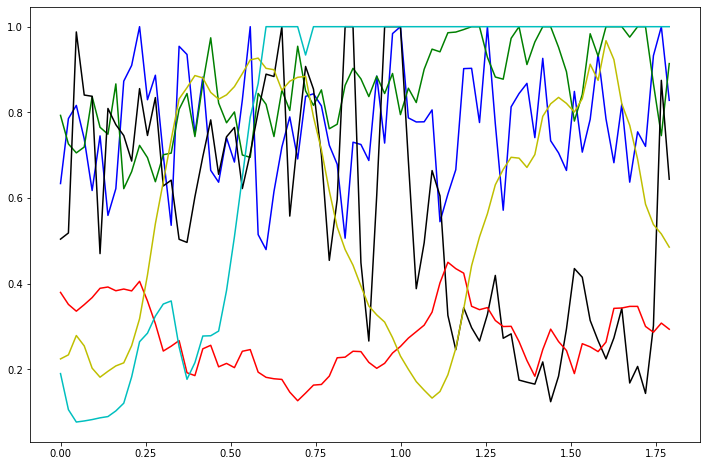

In [18]:
# Chromagram Constant-Q as the y-axis
chroma_cqt_yes_1 = librosa.feature.chroma_cqt(y=sample_yes_audio1, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cqt_yes_2 = librosa.feature.chroma_cqt(y=sample_yes_audio2, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cqt_yes_3 = librosa.feature.chroma_cqt(y=sample_yes_audio3, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cqt_no_1 = librosa.feature.chroma_cqt(y=sample_no_audio1, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cqt_no_2 = librosa.feature.chroma_cqt(y=sample_no_audio2, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cqt_no_3 = librosa.feature.chroma_cqt(y=sample_no_audio3, sr=sr, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(chroma_cqt_yes_2)}
'yes audio 1':  {np.mean(chroma_cqt_yes_1)}
'yes audio 3':  {np.mean(chroma_cqt_yes_3)}
'no audio 1':   {np.mean(chroma_cqt_no_1)}
'no audio 2':   {np.mean(chroma_cqt_no_2)}
'no audio 3':   {np.mean(chroma_cqt_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(chroma_cqt_yes_1)}
'yes audio 2':  {np.std(chroma_cqt_yes_2)}
'yes audio 3':  {np.std(chroma_cqt_yes_3)}
'no audio 1':   {np.std(chroma_cqt_no_1)}
'no audio 2':   {np.std(chroma_cqt_no_2)}
'no audio 3':   {np.std(chroma_cqt_no_3)}

Variance:
'yes audio 1':  {np.var(chroma_cqt_yes_1)}
'yes audio 2':  {np.var(chroma_cqt_yes_2)}
'yes audio 3':  {np.var(chroma_cqt_yes_3)}
'no audio 1':   {np.var(chroma_cqt_no_1)}
'no audio 2':   {np.var(chroma_cqt_no_2)}
'no audio 3':   {np.var(chroma_cqt_no_3)}
""")

# Time as the x-axis
frames = range(0, chroma_cqt_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, chroma_cqt_yes_1, color='b')
plt.plot(t, chroma_cqt_yes_2, color='g')
plt.plot(t, chroma_cqt_yes_3, color='k')
plt.plot(t, chroma_cqt_no_1, color='r')
plt.plot(t, chroma_cqt_no_2, color='y')
plt.plot(t, chroma_cqt_no_3, color='c')
plt.show()

### Chromagram Variant "Chroma Energy Normalised" (CENS)

Mean:
'yes audio 2':  0.32443761825561523
'yes audio 1':  0.2778044044971466
'yes audio 3':  0.26509952545166016
'no audio 1':   0.3358611464500427
'no audio 2':   0.3594980239868164
'no audio 3':   0.5392497777938843

Standard Deviation:
'yes audio 1':  0.007023820653557777
'yes audio 2':  0.08001668006181717
'yes audio 3':  0.07198840379714966
'no audio 1':   0.04174897447228432
'no audio 2':   0.07137658447027206
'no audio 3':   0.2416834682226181

Variance:
'yes audio 1':  4.9334059440298006e-05
'yes audio 2':  0.006402669008821249
'yes audio 3':  0.005182330496609211
'no audio 1':   0.001742976950481534
'no audio 2':   0.005094616673886776
'no audio 3':   0.058410901576280594



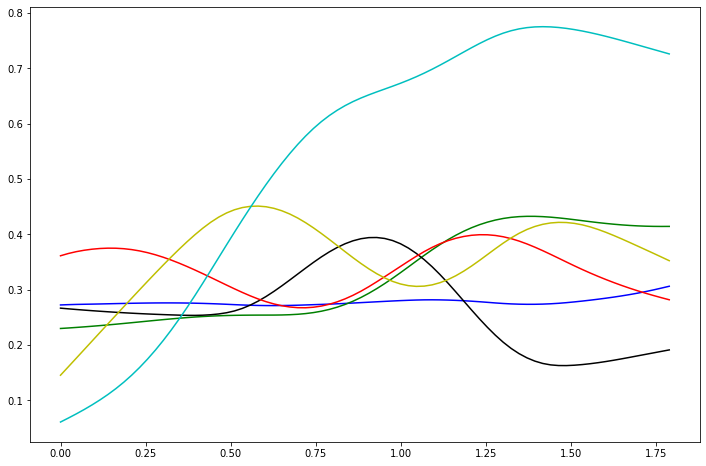

In [19]:
# Chromagram Variant "Chroma Energy Normalised" (CENS) as the y-axis
chroma_cens_yes_1 = librosa.feature.chroma_cens(y=sample_yes_audio1, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cens_yes_2 = librosa.feature.chroma_cens(y=sample_yes_audio2, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cens_yes_3 = librosa.feature.chroma_cens(y=sample_yes_audio3, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cens_no_1 = librosa.feature.chroma_cens(y=sample_no_audio1, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cens_no_2 = librosa.feature.chroma_cens(y=sample_no_audio2, sr=sr, hop_length=HOP_LENGTH)[0]
chroma_cens_no_3 = librosa.feature.chroma_cens(y=sample_no_audio3, sr=sr, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(chroma_cens_yes_2)}
'yes audio 1':  {np.mean(chroma_cens_yes_1)}
'yes audio 3':  {np.mean(chroma_cens_yes_3)}
'no audio 1':   {np.mean(chroma_cens_no_1)}
'no audio 2':   {np.mean(chroma_cens_no_2)}
'no audio 3':   {np.mean(chroma_cens_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(chroma_cens_yes_1)}
'yes audio 2':  {np.std(chroma_cens_yes_2)}
'yes audio 3':  {np.std(chroma_cens_yes_3)}
'no audio 1':   {np.std(chroma_cens_no_1)}
'no audio 2':   {np.std(chroma_cens_no_2)}
'no audio 3':   {np.std(chroma_cens_no_3)}

Variance:
'yes audio 1':  {np.var(chroma_cens_yes_1)}
'yes audio 2':  {np.var(chroma_cens_yes_2)}
'yes audio 3':  {np.var(chroma_cens_yes_3)}
'no audio 1':   {np.var(chroma_cens_no_1)}
'no audio 2':   {np.var(chroma_cens_no_2)}
'no audio 3':   {np.var(chroma_cens_no_3)}
""")

# Time as the x-axis
frames = range(0, chroma_cens_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, chroma_cens_yes_1, color='b')
plt.plot(t, chroma_cens_yes_2, color='g')
plt.plot(t, chroma_cens_yes_3, color='k')
plt.plot(t, chroma_cens_no_1, color='r')
plt.plot(t, chroma_cens_no_2, color='y')
plt.plot(t, chroma_cens_no_3, color='c')
plt.show()

### Variable-Q Chromagram

Mean:
'yes audio 2':  0.8759777545928955
'yes audio 1':  0.7093384861946106
'yes audio 3':  0.5702682137489319
'no audio 1':   0.3445262312889099
'no audio 2':   0.5890718698501587
'no audio 3':   0.7611123919487

Standard Deviation:
'yes audio 1':  0.17065805196762085
'yes audio 2':  0.1342894732952118
'yes audio 3':  0.25412702560424805
'no audio 1':   0.15232443809509277
'no audio 2':   0.2516711950302124
'no audio 3':   0.3571144938468933

Variance:
'yes audio 1':  0.029124168679118156
'yes audio 2':  0.01803366281092167
'yes audio 3':  0.06458054482936859
'no audio 1':   0.02320273220539093
'no audio 2':   0.06333838403224945
'no audio 3':   0.1275307536125183



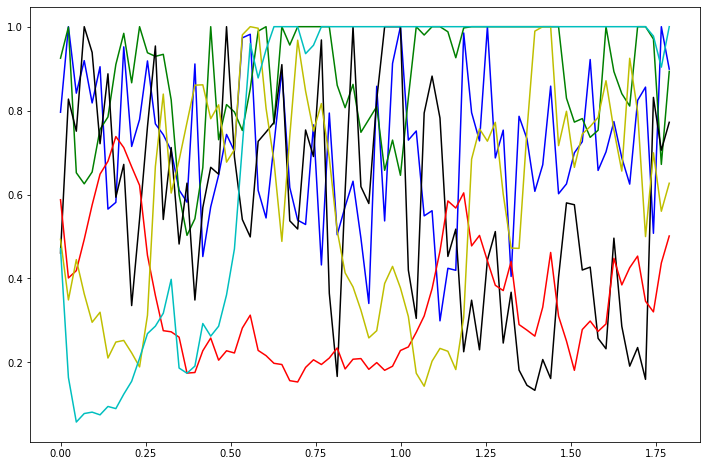

In [20]:
# Variable-Q Chromagram as the y-axis
chroma_vqt_yes_1 = librosa.feature.chroma_vqt(y=sample_yes_audio1, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]
chroma_vqt_yes_2 = librosa.feature.chroma_vqt(y=sample_yes_audio2, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]
chroma_vqt_yes_3 = librosa.feature.chroma_vqt(y=sample_yes_audio3, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]
chroma_vqt_no_1 = librosa.feature.chroma_vqt(y=sample_no_audio1, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]
chroma_vqt_no_2 = librosa.feature.chroma_vqt(y=sample_no_audio2, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]
chroma_vqt_no_3 = librosa.feature.chroma_vqt(y=sample_no_audio3, sr=sr, intervals='ji7', hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(chroma_vqt_yes_2)}
'yes audio 1':  {np.mean(chroma_vqt_yes_1)}
'yes audio 3':  {np.mean(chroma_vqt_yes_3)}
'no audio 1':   {np.mean(chroma_vqt_no_1)}
'no audio 2':   {np.mean(chroma_vqt_no_2)}
'no audio 3':   {np.mean(chroma_vqt_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(chroma_vqt_yes_1)}
'yes audio 2':  {np.std(chroma_vqt_yes_2)}
'yes audio 3':  {np.std(chroma_vqt_yes_3)}
'no audio 1':   {np.std(chroma_vqt_no_1)}
'no audio 2':   {np.std(chroma_vqt_no_2)}
'no audio 3':   {np.std(chroma_vqt_no_3)}

Variance:
'yes audio 1':  {np.var(chroma_vqt_yes_1)}
'yes audio 2':  {np.var(chroma_vqt_yes_2)}
'yes audio 3':  {np.var(chroma_vqt_yes_3)}
'no audio 1':   {np.var(chroma_vqt_no_1)}
'no audio 2':   {np.var(chroma_vqt_no_2)}
'no audio 3':   {np.var(chroma_vqt_no_3)}
""")

# Time as the x-axis
frames = range(0, chroma_vqt_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, chroma_vqt_yes_1, color='b')
plt.plot(t, chroma_vqt_yes_2, color='g')
plt.plot(t, chroma_vqt_yes_3, color='k')
plt.plot(t, chroma_vqt_no_1, color='r')
plt.plot(t, chroma_vqt_no_2, color='y')
plt.plot(t, chroma_vqt_no_3, color='c')
plt.show()

### Melspectrogram

Mean:
'yes audio 2':  3.0945045948028564
'yes audio 1':  0.004595536272972822
'yes audio 3':  0.005989964585751295
'no audio 1':   0.08516448736190796
'no audio 2':   0.12917231023311615
'no audio 3':   0.00011521242413436994

Standard Deviation:
'yes audio 1':  0.005417683161795139
'yes audio 2':  3.007878065109253
'yes audio 3':  0.006681680213660002
'no audio 1':   0.0663825199007988
'no audio 2':   0.14919812977313995
'no audio 3':   0.0002415438211755827

Variance:
'yes audio 1':  2.9351291232160293e-05
'yes audio 2':  9.047329902648926
'yes audio 3':  4.464485027710907e-05
'no audio 1':   0.004406639374792576
'no audio 2':   0.02226008102297783
'no audio 3':   5.834342076127541e-08



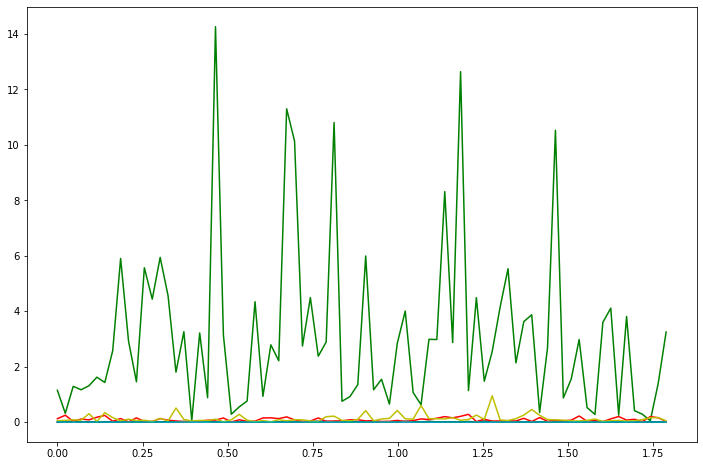

In [21]:
# Melspectrogram as the y-axis
melspectrogram_yes_1 = librosa.feature.melspectrogram(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
melspectrogram_yes_2 = librosa.feature.melspectrogram(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
melspectrogram_yes_3 = librosa.feature.melspectrogram(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
melspectrogram_no_1 = librosa.feature.melspectrogram(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
melspectrogram_no_2 = librosa.feature.melspectrogram(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
melspectrogram_no_3 = librosa.feature.melspectrogram(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(melspectrogram_yes_2)}
'yes audio 1':  {np.mean(melspectrogram_yes_1)}
'yes audio 3':  {np.mean(melspectrogram_yes_3)}
'no audio 1':   {np.mean(melspectrogram_no_1)}
'no audio 2':   {np.mean(melspectrogram_no_2)}
'no audio 3':   {np.mean(melspectrogram_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(melspectrogram_yes_1)}
'yes audio 2':  {np.std(melspectrogram_yes_2)}
'yes audio 3':  {np.std(melspectrogram_yes_3)}
'no audio 1':   {np.std(melspectrogram_no_1)}
'no audio 2':   {np.std(melspectrogram_no_2)}
'no audio 3':   {np.std(melspectrogram_no_3)}

Variance:
'yes audio 1':  {np.var(melspectrogram_yes_1)}
'yes audio 2':  {np.var(melspectrogram_yes_2)}
'yes audio 3':  {np.var(melspectrogram_yes_3)}
'no audio 1':   {np.var(melspectrogram_no_1)}
'no audio 2':   {np.var(melspectrogram_no_2)}
'no audio 3':   {np.var(melspectrogram_no_3)}
""")

# Time as the x-axis
frames = range(0, melspectrogram_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, melspectrogram_yes_1, color='b')
plt.plot(t, melspectrogram_yes_2, color='g')
plt.plot(t, melspectrogram_yes_3, color='k')
plt.plot(t, melspectrogram_no_1, color='r')
plt.plot(t, melspectrogram_no_2, color='y')
plt.plot(t, melspectrogram_no_3, color='c')
plt.show()

### Mel-Frequency Cepstral Coefficients (MFCCs)

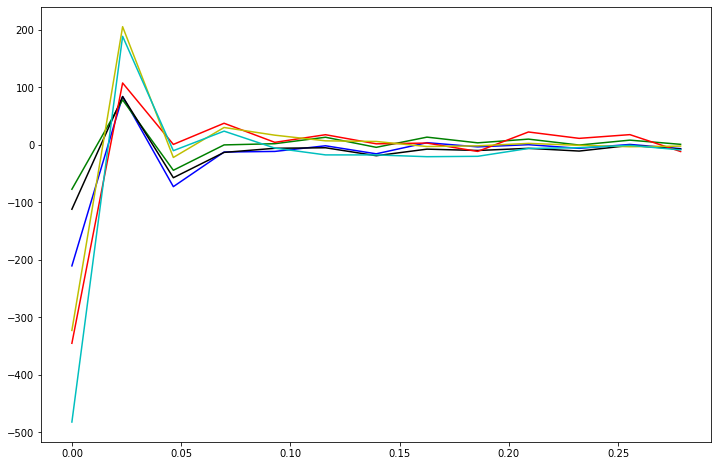

In [22]:
n_mfcc = 13 # usually in the range from 12 to 19

# Mel-Frequency Cepstral Coefficients (MFCCs) as the y-axis
mfccs_yes_1 = librosa.feature.mfcc(y=sample_yes_audio1, sr=sr, n_mfcc=n_mfcc)# [0]
mfccs_yes_2 = librosa.feature.mfcc(y=sample_yes_audio2, sr=sr, n_mfcc=n_mfcc)# [0]
mfccs_yes_3 = librosa.feature.mfcc(y=sample_yes_audio3, sr=sr, n_mfcc=n_mfcc)# [0]
mfccs_no_1 = librosa.feature.mfcc(y=sample_no_audio1, sr=sr, n_mfcc=n_mfcc)# [0]
mfccs_no_2 = librosa.feature.mfcc(y=sample_no_audio2, sr=sr, n_mfcc=n_mfcc)# [0]
mfccs_no_3 = librosa.feature.mfcc(y=sample_no_audio3, sr=sr, n_mfcc=n_mfcc)# [0]

mfccs = [mfccs_yes_1, mfccs_yes_2, mfccs_yes_3, mfccs_no_1, mfccs_no_2, mfccs_no_3]
new_mfccs = []

for mfcc in mfccs:
    new_mfcc = []
    for row_index in range(n_mfcc):
        new_mfcc.append(np.mean(mfcc[row_index, 1:]))
    new_mfcc = np.array(new_mfcc)
    new_mfccs.append(new_mfcc)
new_mfccs = np.array(new_mfccs)

# Time as the x-axis
frames = range(0, new_mfccs[0].size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, new_mfccs[0], color='b')
plt.plot(t, new_mfccs[1], color='g')
plt.plot(t, new_mfccs[2], color='k')
plt.plot(t, new_mfccs[3], color='r')
plt.plot(t, new_mfccs[4], color='y')
plt.plot(t, new_mfccs[5], color='c')
plt.show()

### Poly Features

Mean:
'yes audio 2':  -0.00022322069535822857
'yes audio 1':  -6.854442119076652e-05
'yes audio 3':  -0.00019299928729983877
'no audio 1':   -3.7903208403053305e-05
'no audio 2':   -8.473667525328048e-05
'no audio 3':   -2.143707299144067e-05

Standard Deviation:
'yes audio 1':  5.815937758856769e-06
'yes audio 2':  2.5376076972283394e-05
'yes audio 3':  4.2731461813308374e-05
'no audio 1':   1.0607789966470405e-05
'no audio 2':   2.3184246261166163e-05
'no audio 3':   6.942410943885732e-06

Variance:
'yes audio 1':  3.3825132014895896e-11
'yes audio 2':  6.439452825032516e-10
'yes audio 3':  1.825977828702232e-09
'no audio 1':   1.125252079727502e-10
'no audio 2':   5.375092746983972e-10
'no audio 3':   4.819706971378438e-11



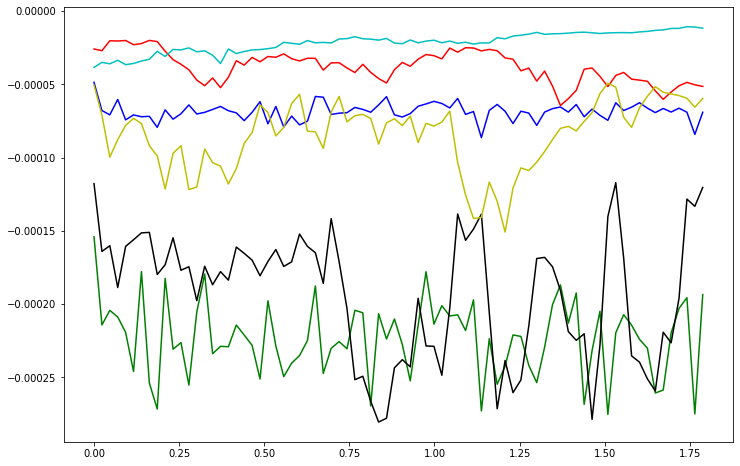

In [23]:
# Poly Features as the y-axis
poly_features_yes_1 = librosa.feature.poly_features(y=sample_yes_audio1, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
poly_features_yes_2 = librosa.feature.poly_features(y=sample_yes_audio2, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
poly_features_yes_3 = librosa.feature.poly_features(y=sample_yes_audio3, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
poly_features_no_1 = librosa.feature.poly_features(y=sample_no_audio1, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
poly_features_no_2 = librosa.feature.poly_features(y=sample_no_audio2, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
poly_features_no_3 = librosa.feature.poly_features(y=sample_no_audio3, order=1.5, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(poly_features_yes_2)}
'yes audio 1':  {np.mean(poly_features_yes_1)}
'yes audio 3':  {np.mean(poly_features_yes_3)}
'no audio 1':   {np.mean(poly_features_no_1)}
'no audio 2':   {np.mean(poly_features_no_2)}
'no audio 3':   {np.mean(poly_features_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(poly_features_yes_1)}
'yes audio 2':  {np.std(poly_features_yes_2)}
'yes audio 3':  {np.std(poly_features_yes_3)}
'no audio 1':   {np.std(poly_features_no_1)}
'no audio 2':   {np.std(poly_features_no_2)}
'no audio 3':   {np.std(poly_features_no_3)}

Variance:
'yes audio 1':  {np.var(poly_features_yes_1)}
'yes audio 2':  {np.var(poly_features_yes_2)}
'yes audio 3':  {np.var(poly_features_yes_3)}
'no audio 1':   {np.var(poly_features_no_1)}
'no audio 2':   {np.var(poly_features_no_2)}
'no audio 3':   {np.var(poly_features_no_3)}
""")

# Time as the x-axis
frames = range(0, poly_features_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, poly_features_yes_1, color='b')
plt.plot(t, poly_features_yes_2, color='g')
plt.plot(t, poly_features_yes_3, color='k')
plt.plot(t, poly_features_no_1, color='r')
plt.plot(t, poly_features_no_2, color='y')
plt.plot(t, poly_features_no_3, color='c')
plt.show()

### Tonal Centroid Features (tonnetz)

Mean:
'yes audio 2':  0.014056214033447142
'yes audio 1':  -0.0030646637243587006
'yes audio 3':  -0.023753562947688
'no audio 1':   -0.10150482169213626
'no audio 2':   0.045788261602045376
'no audio 3':   0.037104274779496335

Standard Deviation:
'yes audio 1':  0.02714506330190023
'yes audio 2':  0.023106885773336795
'yes audio 3':  0.05547187984332944
'no audio 1':   0.056453731856085855
'no audio 2':   0.06695636233909621
'no audio 3':   0.0937434332728858

Variance:
'yes audio 1':  0.0007368544616641707
'yes audio 2':  0.0005339281701420343
'yes audio 3':  0.003077129453352779
'no audio 1':   0.0031870238404788425
'no audio 2':   0.004483154457684342
'no audio 3':   0.008787831281787993



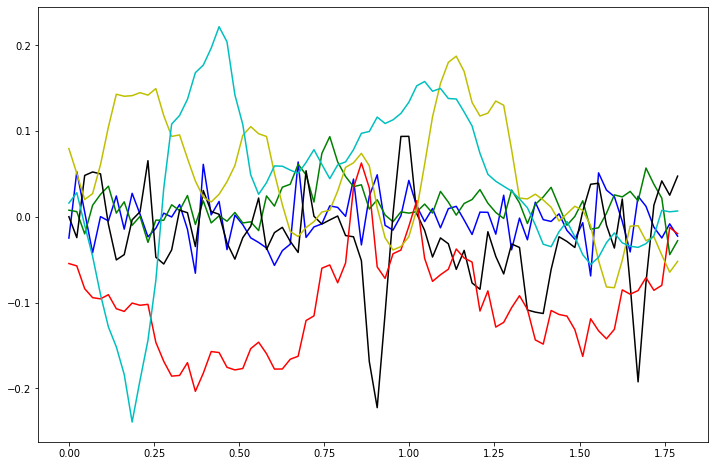

In [24]:
# Tonal Centroid Features as the y-axis
tonnetz_yes_1 = librosa.feature.tonnetz(y=sample_yes_audio1, sr=sr)[0]
tonnetz_yes_2 = librosa.feature.tonnetz(y=sample_yes_audio2, sr=sr)[0]
tonnetz_yes_3 = librosa.feature.tonnetz(y=sample_yes_audio3, sr=sr)[0]
tonnetz_no_1 = librosa.feature.tonnetz(y=sample_no_audio1, sr=sr)[0]
tonnetz_no_2 = librosa.feature.tonnetz(y=sample_no_audio2, sr=sr)[0]
tonnetz_no_3 = librosa.feature.tonnetz(y=sample_no_audio3, sr=sr)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(tonnetz_yes_2)}
'yes audio 1':  {np.mean(tonnetz_yes_1)}
'yes audio 3':  {np.mean(tonnetz_yes_3)}
'no audio 1':   {np.mean(tonnetz_no_1)}
'no audio 2':   {np.mean(tonnetz_no_2)}
'no audio 3':   {np.mean(tonnetz_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(tonnetz_yes_1)}
'yes audio 2':  {np.std(tonnetz_yes_2)}
'yes audio 3':  {np.std(tonnetz_yes_3)}
'no audio 1':   {np.std(tonnetz_no_1)}
'no audio 2':   {np.std(tonnetz_no_2)}
'no audio 3':   {np.std(tonnetz_no_3)}

Variance:
'yes audio 1':  {np.var(tonnetz_yes_1)}
'yes audio 2':  {np.var(tonnetz_yes_2)}
'yes audio 3':  {np.var(tonnetz_yes_3)}
'no audio 1':   {np.var(tonnetz_no_1)}
'no audio 2':   {np.var(tonnetz_no_2)}
'no audio 3':   {np.var(tonnetz_no_3)}
""")

# Time as the x-axis
frames = range(0, tonnetz_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, tonnetz_yes_1, color='b')
plt.plot(t, tonnetz_yes_2, color='g')
plt.plot(t, tonnetz_yes_3, color='k')
plt.plot(t, tonnetz_no_1, color='r')
plt.plot(t, tonnetz_no_2, color='y')
plt.plot(t, tonnetz_no_3, color='c')
plt.show()